In [30]:
! pip install geopandas
! pip install pulp
! pip install spopt
! pip install glpk
! pip install coinor-cbc
! pip install matplotlib-scalebar

  Using cached glpk-0.4.7.tar.gz (161 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build glpk


  error: subprocess-exited-with-error
  
  × Building wheel for glpk (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [11 lines of output]
      WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
      Traceback (most recent call last):
        File "C:\Users\ASUS\AppData\Local\Temp\pip-build-env-fue3otim\overlay\Lib\site-packages\setuptools_scm\_integration\pyproject_reading.py", line 36, in read_pyproject
          section = defn.get("tool", {})[tool_name]
                    ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
      KeyError: 'setuptools_scm'
      running bdist_wheel
      running build
      running build_ext
      building 'glpk' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a p

In [31]:
%config InlineBackend.figure_format = "retina"
%load_ext watermark
%watermark

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2024-06-18T00:45:04.481285+07:00

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.24.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [32]:
import pandas as pd
import networkx as nx
import geopandas
from spopt.locate import LSCP
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.lines as mlines
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry import Point
import time
import numpy as np
import pulp
import shapely
import spopt
from spopt.locate import PCenter, simulated_geo_points

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # ignore deprecation warning - GH pysal/spaghetti#649
    import spaghetti

%watermark -w
%watermark -iv

Watermark: 2.4.3

matplotlib         : 3.8.4
numpy              : 1.26.4
matplotlib_scalebar: 0.8.1
pandas             : 2.2.2
geopandas          : 0.14.4
spopt              : 0.6.0
spaghetti          : 1.7.5.post1
shapely            : 2.0.4
pulp               : 2.8.0
networkx           : 3.3



In [33]:
network_distance = pd.read_csv('C:/Users/ASUS/Downloads/rescue_station_project/data/csv/network_distance.csv')
network_distance

,StartPoint,EndPoint,Distance,net_length
0,0,1,10.0,500.0
1,1,2,10.0,0.0
2,2,3,10.0,0.0
3,3,4,10.0,0.0
4,4,5,10.0,0.0
...,...,...,...,...
2496,49,45,40.0,0.0
2497,49,46,30.0,0.0
2498,49,47,20.0,0.0
2499,49,48,10.0,0.0


In [34]:
facility_points = pd.read_csv('C:/Users/ASUS/Downloads/rescue_station_project/data/csv/facility_points.csv')
facility_points = facility_points.reset_index(drop=True)
facility_points

,Id,FacilityPoints,XX,YY
0,0,0,612684.883012,1.189163e+06
1,1,1,612684.883012,1.189173e+06
2,2,2,612684.883012,1.189183e+06
3,3,3,612684.883012,1.189193e+06
4,4,4,612684.883012,1.189203e+06
5,5,5,612684.883012,1.189213e+06
6,6,6,612684.883012,1.189223e+06
7,7,7,612684.883012,1.189233e+06
8,8,8,612684.883012,1.189243e+06
9,9,9,612684.883012,1.189253e+06


In [35]:
study_area = geopandas.read_file('C:/Users/ASUS/Downloads/rescue_station_project/data/shapefile/Thuyhe_HCM_motphan_DISSOLVE_Line5/Thuyhe_HCM_motphan_DISSOLVE_Line5_84.shp').dissolve()
study_area

,geometry,FID_Thuyhe,Id,FromPoint,ToPoint,chieudai
0,"MULTILINESTRING ((106.82627 10.76692, 106.8262...",1,0,-1,-1,14496.490398


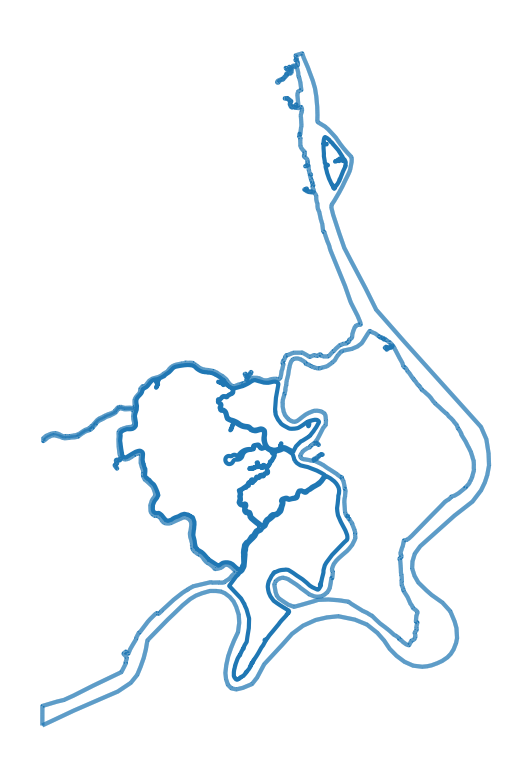

In [36]:
base = study_area.plot()
base.axis("off");
plt.show()

In [37]:
# Tạo bảng pivot từ dataframe
pivot_table = network_distance.pivot_table(values='Distance', index='EndPoint', columns='StartPoint')

# Thay thế các giá trị NaN = 0
cost_matrix = pivot_table.fillna(0).astype(int)

print(cost_matrix)

StartPoint   0    1    2    3    4    5    6    7    8    9   ...   40   41  \
EndPoint                                                      ...             
1            10    0   10   20   30   39   50   59   69   80  ...  389  399   
2            20   10    0   10   20   29   40   49   59   70  ...  379  389   
3            30   20   10    0   10   19   30   39   49   60  ...  369  379   
4            40   30   20   10    0    9   19   29   39   49  ...  359  369   
5            49   39   29   19    9    0   10   19   29   40  ...  349  359   
6            60   50   40   30   19   10    0    9   19   29  ...  339  349   
7            69   59   49   39   29   19    9    0   10   20  ...  329  339   
8            79   69   59   49   39   29   19   10    0   10  ...  319  329   
9            90   80   70   60   49   40   29   20   10    0  ...  309  319   
10           99   89   79   69   59   49   39   29   19    9  ...  299  309   
11          109   99   89   79   69   59   49   39  

In [38]:
# Cho user nhập P_FACILITIES
P_FACILITIES = int(input("Enter the number of candidate facilities (P_FACILITIES): "))

# Tính tổng network length
total_net_length = network_distance['net_length'].sum()

# Tính SERVICE_RADIUS từ net length
SERVICE_RADIUS = total_net_length / (P_FACILITIES * 2)

# Làm tròn 2 số thập phân
SERVICE_RADIUS = round(SERVICE_RADIUS, 2)

# In giá trị
print(f"P_FACILITIES: {P_FACILITIES}")
print(f"SERVICE_RADIUS: {SERVICE_RADIUS}")


P_FACILITIES: 10
SERVICE_RADIUS: 25.0


In [39]:
# Khởi tạo và giải quyết bài toán LSCP
lscp = LSCP.from_cost_matrix(cost_matrix, SERVICE_RADIUS)
lscp = lscp.solve(pulp.GLPK(msg=False))

# Lấy giá trị objective
lscp_objval = lscp.problem.objective.value()

# Tạo danh sách các điểm được chọn trong lscp_objval
selected_facilities = [i for i, dv in enumerate(lscp.fac_vars) if dv.varValue]

# Tạo DataFrame từ danh sách các điểm được chọn
selected_facilities_df = facility_points.iloc[selected_facilities].reset_index(drop=True)

# In giá trị objective và DataFrame các điểm được chọn
print("Objective value:", lscp_objval)
print("Các điểm được chọn làm facility:")
print(selected_facilities_df)

Objective value: 10
Các điểm được chọn làm facility:
   Id  FacilityPoints             XX            YY
0   3               3  612684.883012  1.189193e+06
1   8               8  612684.883012  1.189243e+06
2  13              13  612684.883012  1.189293e+06
3  18              18  612684.883012  1.189343e+06
4  23              23  612684.883012  1.189393e+06
5  28              28  612684.883012  1.189443e+06
6  33              33  612684.883012  1.189493e+06
7  38              38  612684.883012  1.189543e+06
8  43              43  612684.883012  1.189593e+06
9  48              48  612702.265361  1.189630e+06


In [40]:
import os
import random
from datetime import datetime

# Tạo tên file với giá trị lscp_objval, thời gian hiện tại, ngày tháng hiện tại và số ngẫu nhiên
current_time = datetime.now().strftime("%H%M%S_%d%m%Y")  # Giờ phút giây và ngày tháng năm hiện tại
random_number = random.randint(1000, 9999)  # Số ngẫu nhiên
file_name = f"ketqua_{lscp_objval}LSCP_{current_time}_{random_number}.csv"

# Đường dẫn thư mục lưu trữ file
directory = "C:/Users/ASUS/Downloads/rescue_station_project/DB_Results/DB_Result_LSCP_Rescue_Station"

# Tạo thư mục nếu chưa tồn tại
os.makedirs(directory, exist_ok=True)

# Đường dẫn đầy đủ đến file CSV
file_path = os.path.join(directory, file_name)

# Xuất DataFrame thành file CSV
selected_facilities_df.to_csv(file_path, index=False)

print(f"File đã được lưu tại: {file_path}")

File đã được lưu tại: C:/Users/ASUS/Downloads/rescue_station_project/DB_Results/DB_Result_LSCP_Rescue_Station\ketqua_10LSCP_004511_18062024_8102.csv


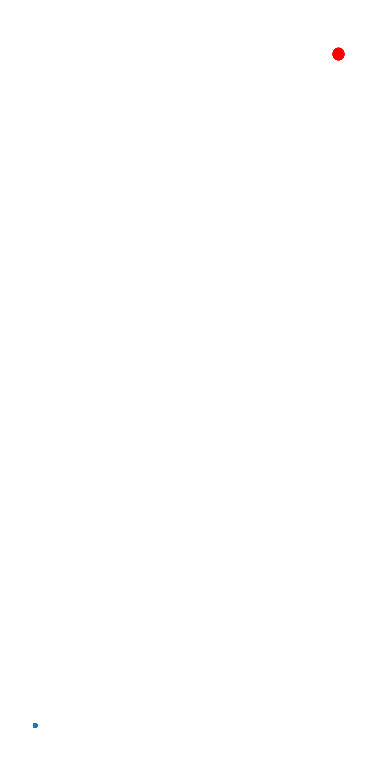

In [50]:
# Đọc DataFrame từ file CSV
data = pd.read_csv(file_path)

# Chuyển các cột XX và YY thành đối tượng Point
geometry = [Point(xy) for xy in zip(data['XX'], data['YY'])]

# Tạo GeoDataFrame từ DataFrame và geometry
gdf = geopandas.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Vẽ study_area
base = study_area.plot()

# Vẽ dữ liệu từ GeoDataFrame trên study_area
gdf.plot(ax=base, color='red', markersize=10)

# Tắt trục
base.axis("off")

# Hiển thị biểu đồ
plt.show()

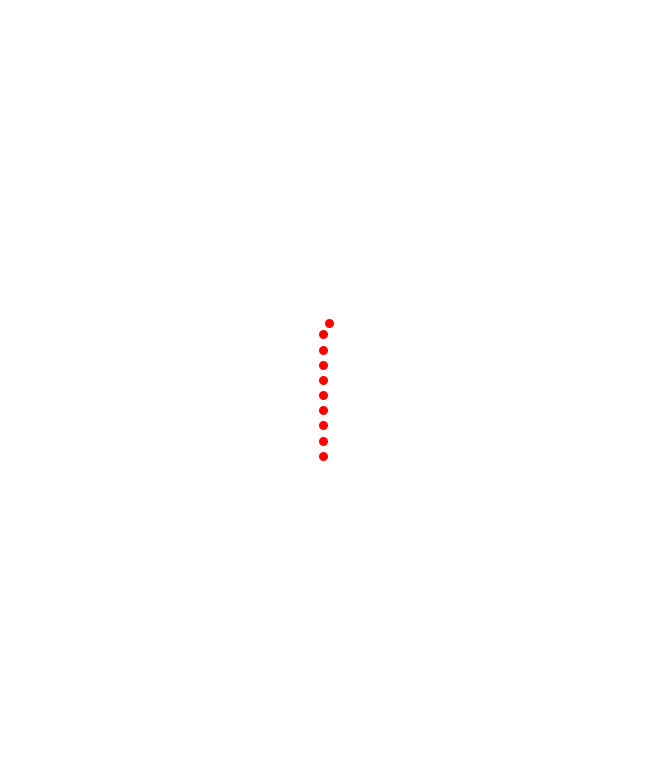

In [28]:
# Chuyển các cột XX và YY thành đối tượng Point
geometry = [Point(xy) for xy in zip(data['XX'], data['YY'])]

# Tạo GeoDataFrame từ DataFrame và geometry
gdf = geopandas.GeoDataFrame(data, geometry=geometry, crs="EPSG:32648")

# Vẽ study_area
base = study_area.plot()

# Vẽ dữ liệu từ GeoDataFrame trên study_area
gdf.plot(ax=base, color='red', markersize=5)

# Tắt trục
base.axis("off")

# Thiết lập giới hạn trục dựa trên dữ liệu trong GeoDataFrame
buffer = 1000  # Giá trị buffer để thêm vào giới hạn trục, đơn vị là mét
x_min, y_min, x_max, y_max = gdf.total_bounds
base.set_xlim(x_min - buffer, x_max + buffer)
base.set_ylim(y_min - buffer, y_max + buffer)

# Hiển thị biểu đồ
plt.show()
